In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path
from myshow import myshow, myshow3d
import numpy as np
import nibabel as nib
import os
from dipy.align.imaffine import AffineMap

/Users/naimsassine/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%matplotlib inline

In [78]:
# let's load the numpys and see if it worked?
# maybe shil el niigz medre shou
mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/ProstateX-0004.nii.gz.npy')
lesion_mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0004-Finding1-t2_tse_tra_ROI.nii.gz.npy')
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')
t2_case_04 = t2_train_table.iloc[6]
t2_case_04_image = sitk.ReadImage(str(t2_case_04['resampled_nifti']))
t2_array_c = sitk.GetArrayViewFromImage(t2_case_04_image)

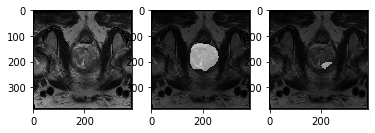

In [30]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array_c[8, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array_c[8, :, :], 'gray', interpolation='none')
plt.imshow(mask[8, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array_c[8, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask[8, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()

In [34]:
# let's sum two masks up and see what it gives
summed = mask + lesion_mask

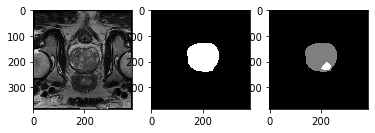

In [109]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array_c[12, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array_c[12, :, :], 'gray', interpolation='none')
plt.imshow(mask[12, :, :], 'gray', interpolation='none', alpha=1)

plt.subplot(1,3,3)
plt.imshow(t2_array_c[12, :, :], 'gray', interpolation='none')
plt.imshow(summed[12, :, :], 'gray', interpolation='none', alpha=1)

plt.show()

In [96]:
np.unique(mask)

array([0.00000000e+00, 4.39892703e-06, 4.54676321e-06, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [104]:
thresh = 0.0
im_bool = mask > thresh
maxval = 1
bin_mask = (mask > thresh) * maxval

im_bool = lesion_mask > thresh
bin_les = (lesion_mask > thresh) * maxval

summed_bin = bin_mask + bin_les

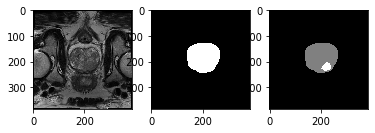

In [106]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array_c[12, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array_c[12, :, :], 'gray', interpolation='none')
plt.imshow(bin_mask[12, :, :], 'gray', interpolation='none', alpha=1)

plt.subplot(1,3,3)
plt.imshow(t2_array_c[12, :, :], 'gray', interpolation='none')
plt.imshow(summed_bin[12, :, :], 'gray', interpolation='none', alpha=1)

plt.show()

In [110]:
np.unique(summed_bin)

array([0, 1, 2])

In [128]:
# let's sum them up, donner plus de valeurs au significant lesions, and save everything in a numpy

# read the csv table
# for each line in the table, take a lesion mask file and locate the prostate mask also
# if its significant, sum it twice with the prostate mask
# if not, sum it once, so you would have values 0 for the background, 1 for the prostate, 2 for the lesions, 3 for the significant lesions


def sum_lesions_to_pros_masks() :
    path_pros = 'E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/'
    path_les = 'E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/'
    lesions_table = pd.read_csv('E:/Memoire/ProstateX/Masks/Files/lesions/PROSTATEx_Classes.csv')
    for i in range(0, 299) : 
        lesion_case = lesions_table.iloc[i]
        prostate_mask = np.load(path_pros + lesion_case["ID"][:14] + ".nii.gz.npy")
        lesion_mask = np.load(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra_ROI.nii.gz.npy")

        if lesion_case["Clinically Significant"] == "True" : 
            summed = prostate_mask + lesion_mask + lesion_mask
        else : 
            summed = prostate_mask + lesion_mask
        
        filepath = 'E:/Memoire/ProstateX/generated/Masks/Summed/' + lesion_case["ID"]
        np.save(Path(filepath), summed)



In [218]:
lesions_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')
for i in range(0, 299) : 
    lesion_case = lesions_table.iloc[i]
    image = sitk.ReadImage(str(lesion_case['resampled_nifti']))
    if image.GetSize()[0] != 384 or image.GetSize()[1] != 384 : 
        print(lesion_case)
        print(image.GetSize())

Unnamed: 0                                                        90
ProxID                                                ProstateX-0054
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                2
pos                                     (20.3595, 31.1926, -6.71699)
ijk                                                    (237, 216, 9)
zone                                                              PZ
ClinSig                                                        False
Name: 76, dtype: object
(385, 385, 21)
Unnamed: 0                                                        92
ProxID                                                ProstateX-0054
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type      

SystemError: <built-in function ReadImage> returned a result with an error set

In [211]:
path_to_nifti_mask = Path('E:/Memoire/ProstateX/Masks/Files/prostate/mask_prostate/')
path_to_nifti_lesion = Path('E:/Memoire/ProstateX/Masks/Files/lesions/Masks/T2/')

pros_masks_path = [x for x in path_to_nifti_mask.iterdir()]    
pros_masks_path = [str(x) for x in pros_masks_path]

les_masks_path = [x for x in path_to_nifti_lesion.iterdir()]    
les_masks_path = [str(x) for x in les_masks_path]




for i in range(len(les_masks_path)) :
    if "._" not in les_masks_path[i] : 
        name = les_masks_path[i].split("/")[10][:14]
        path_pros = 'E:/Memoire/ProstateX/Masks/Files/prostate/mask_prostate/' + name + '.nii.gz'
        
        try : 
            pros_mask = sitk.ReadImage(str(path_pros))
        except :
            name = name[:11]+name[12]+name[13]
            path_pros = 'E:/Memoire/ProstateX/Masks/Files/prostate/mask_prostate/' + name + '.nii.gz' 
            pros_mask = sitk.ReadImage(str(path_pros))
        size_pros = pros_mask.GetSize()
        spacing_pros = pros_mask.GetSpacing()

        pros_lesion = sitk.ReadImage(str(les_masks_path[i]))
        size_les = pros_lesion.GetSize()
        spacing_les = pros_lesion.GetSpacing()

        if size_pros != size_les : 
            print(name)
            print(size_pros)
            print(size_les)
            print(spacing_pros)
            print(spacing_les)


ProstateX-0102
(320, 320, 21)
(384, 384, 21)
(0.6000000238418579, 0.6000000238418579, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0141
(640, 640, 21)
(384, 384, 21)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0141
(640, 640, 21)
(384, 384, 21)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0141
(640, 640, 21)
(384, 384, 21)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0160
(640, 640, 21)
(384, 384, 21)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0165
(640, 640, 19)
(384, 384, 19)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0166
(640, 640, 19)
(384, 384, 19)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0168
(640, 640, 19)
(384, 384, 19)
(0.30000001192092896, 0.30000001192092896, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0173
(320, 320, 21)
(384, 384, 21)
(0.6000000238418579, 0.6000000238418579, 3.0)
(0.5, 0.5, 3.0)
ProstateX-0173
(320, 32

In [9]:
path_pros = 'E:/Memoire/ProstateX/generated/Masks/Resampled/Prostate_Masks/'
path_les = 'E:/Memoire/ProstateX/generated/Masks/Resampled/T2_Lesions_Masks/'
lesions_table = pd.read_csv('E:/Memoire/ProstateX/Masks/Files/lesions/PROSTATEx_Classes.csv')
list_of_problems = []
for i in range(0, 299) : 
    lesion_case = lesions_table.iloc[i]
    prostate_mask = sitk.ReadImage(path_pros + lesion_case["ID"][:14] + ".nii.gz")
    try : 
        lesion_mask = sitk.ReadImage(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra_ROI.nii.gz")
    except : 
        lesion_mask = sitk.ReadImage(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra0_ROI.nii.gz")

    if prostate_mask.GetSize() != lesion_mask.GetSize() :
        print(lesion_case["ID"])
        print(prostate_mask.GetSize())
        print(lesion_mask.GetSize())
        list_of_problems.append(lesion_case["ID"])

ProstateX-0102_Finding1
(385, 385, 21)
(384, 384, 21)
ProstateX-0141_Finding1
(385, 385, 21)
(384, 384, 21)
ProstateX-0141_Finding2
(385, 385, 21)
(384, 384, 21)
ProstateX-0141_Finding3
(385, 385, 21)
(384, 384, 21)
ProstateX-0160_Finding1
(385, 385, 21)
(384, 384, 21)
ProstateX-0165_Finding1
(385, 385, 19)
(384, 384, 19)
ProstateX-0166_Finding1
(385, 385, 19)
(384, 384, 19)
ProstateX-0168_Finding1
(385, 385, 19)
(384, 384, 19)
ProstateX-0173_Finding1
(385, 385, 21)
(384, 384, 21)
ProstateX-0173_Finding2
(385, 385, 21)
(384, 384, 21)
ProstateX-0181_Finding1
(385, 385, 25)
(384, 384, 25)


In [81]:
path_pros = 'E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/'
path_les = 'E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/'
lesions_table = pd.read_csv('E:/Memoire/ProstateX/Masks/Files/lesions/PROSTATEx_Classes.csv')
list_of_problems = []
for i in range(0, 299) : 
    lesion_case = lesions_table.iloc[i]
    prostate_mask = np.load(path_pros + lesion_case["ID"][:14] + ".nii.gz.npy")
    try : 
        lesion_mask = np.load(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra_ROI.nii.gz.npy")
    except : 
        lesion_mask = np.load(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra0_ROI.nii.gz.npy")

    if prostate_mask.shape != lesion_mask.shape :
        list_of_problems.append(lesion_case["ID"])


In [82]:
list_of_problems 

[]

In [63]:
# let's import these, and draw them, to see whatsupp
# let's load the numpys and see if it worked?
# maybe shil el niigz medre shou
mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/ProstateX-0050.nii.gz.npy')
lesion_mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0050-Finding1-t2_tse_tra_ROI.nii.gz.npy')

In [70]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')
t2_case = t2_train_table.iloc[68]
t2_case_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
t2_array = sitk.GetArrayViewFromImage(t2_case_image)
print(t2_case)

Unnamed: 0                                                        81
ProxID                                                ProstateX-0046
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                2
pos                                     (-4.84385, 2.95186, 35.0858)
ijk                                                    (196, 212, 8)
zone                                                              PZ
ClinSig                                                        False
Name: 68, dtype: object


In [65]:
# let's do a myshow of the original one
path = 'E:/Memoire/ProstateX/Masks/Files/lesions/Masks/T2/ProstateX-0050-Finding1-t2_tse_tra_ROI.nii'
image = sitk.ReadImage(path)
myshow(image)

interactive(children=(IntSlider(value=11, description='z', max=22), Output()), _dom_classes=('widget-interact'…

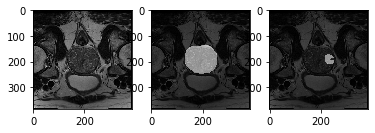

In [67]:
z = 11
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(mask[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()

In [66]:
print(lesion_mask.shape)
print(mask.shape)
print(image.GetSize())

(23, 384, 384)
(23, 384, 384)
(384, 384, 23)


In [6]:
# let's do a myshow of the original one
path = 'E:/Memoire/ProstateX/Masks/Files/lesions/Masks/T2/ProstateX-0046-Finding2-t2_tse_tra_ROI.nii'
image = sitk.ReadImage(path)

In [7]:
image.GetSize()

(384, 384, 19)

In [8]:
path = 'E:/Memoire/ProstateX/generated/Masks/Resampled/T2_Lesions_Masks/ProstateX-0046-Finding2-t2_tse_tra_ROI.nii'
image = sitk.ReadImage(path)
image.GetSize()

(384, 384, 19)

In [32]:
path = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0046-Finding2-t2_tse_tra_ROI.nii.gz.npy')
path.shape

(21, 384, 384)

In [268]:
# let's do a myshow of the original one
# there is something not right with the npy, cause the resampled is looking good
path = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0046-Finding2-t2_tse_tra_ROI.nii.gz.npy')

image = sitk.GetImageFromArray(path)

In [34]:
t2 = nib.load(str(t2_case['resampled_nifti']))
MASK_PROS = nib.load('E:/Memoire/ProstateX/generated/Masks/Resampled/Prostate_Masks/ProstateX-0050.nii.gz')
MASK_LES = nib.load('E:/Memoire/ProstateX/generated/Masks/Resampled/T2_Lesions_Masks/ProstateX-0050-Finding1-t2_tse_tra_ROI.nii.gz')

t2_static = t2.get_fdata()
t2_static_grid2world = t2.affine

MASK_PROS_moving = MASK_PROS.get_fdata()
MASK_PROS_moving_grid2world = MASK_PROS.affine

MASK_LES_moving = MASK_LES.get_fdata()
MASK_LES_moving_grid2world = MASK_LES.affine

identity = np.eye(4)
MASK_PROS_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, MASK_PROS_moving.shape, MASK_PROS_moving_grid2world)
MASK_LES_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, MASK_LES_moving.shape, MASK_LES_moving_grid2world)


transformMASK_PROS = MASK_PROS_affine_map.transform(MASK_PROS_moving)
transformMASK_LES = MASK_LES_affine_map.transform(MASK_LES_moving)

transposed_pros = transformMASK_PROS.transpose(2,0,1)
for j in range(len(transposed_pros)) : 
    transposed_pros[j] = np.fliplr(np.rot90(np.fliplr(transposed_pros[j]), 3))

transposed_les = transformMASK_LES.transpose(2,0,1)
for j in range(len(transposed_les)) : 
    transposed_les[j] = np.fliplr(np.rot90(np.fliplr(transposed_les[j]), 3))
#np.save('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0046-Finding2-t2_tse_tra_ROI.nii.gz', transposed_les)

In [37]:
print(transposed_les.shape)
print(transposed_pros.shape)

(21, 384, 384)
(21, 384, 384)


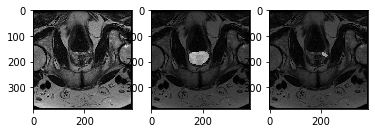

In [277]:
z = 8
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(mask[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(transposed_les[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()

In [163]:
t2_case_25 = t2_train_table.iloc[34]
t2_case_image_25 = sitk.ReadImage(str(t2_case_25['resampled_nifti']))
t2_array_25 = sitk.GetArrayViewFromImage(t2_case_image_25)
t2_case_25

Unnamed: 0                                                        39
ProxID                                                ProstateX-0025
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                1
pos                                       (23.6983, 51.83, -55.7923)
ijk                                                    (243, 231, 9)
zone                                                              PZ
ClinSig                                                        False
Name: 34, dtype: object

In [145]:
# lets study case the 25 findings : 
# ptn ils partent en couille, y a deux finding ids avec 1?
# Load les numpys
mask_25 = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/ProstateX-0025.nii.gz.npy')
lesion_mask_25 = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0025-Finding1-t2_tse_tra_ROI.nii.gz.npy')

t2_case_25 = t2_train_table.iloc[34]
t2_case_image_25 = sitk.ReadImage(str(t2_case_25['resampled_nifti']))
t2_array_25 = sitk.GetArrayViewFromImage(t2_case_image_25)

# load les resampled
path = 'E:/Memoire/ProstateX/generated/Masks/Resampled/T2_Lesions_Masks/ProstateX-0025-Finding1-t2_tse_tra_ROI.nii'
lesion_resampled = sitk.ReadImage(path)
path = 'E:/Memoire/ProstateX/generated/Masks/Resampled/Prostate_Masks/ProstateX-0025.nii'
prostate_resampled = sitk.ReadImage(path)


# load les originaux
path = 'E:/Memoire/ProstateX/Masks/Files/lesions/Masks/T2/ProstateX-0025-Finding1-t2_tse_tra_ROI.nii'
lesion_original = sitk.ReadImage(path)
path = 'E:/Memoire/ProstateX/Masks/Files/prostate/mask_prostate/ProstateX-0025.nii'
prostate_original = sitk.ReadImage(path)


In [148]:
path = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0025/t2/4_t2_tse_tra.nii.gz'
original_t2 = sitk.ReadImage(path)

In [149]:
print(mask_25.shape)
print(t2_array_25.shape)
print(prostate_resampled.GetSize())
print(prostate_original.GetSize())
print(original_t2.GetSize())

(21, 384, 384)
(21, 384, 384)
(384, 384, 19)
(384, 384, 19)
(384, 384, 21)


In [132]:
myshow(prostate_resampled)

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [122]:
myshow(sitk.GetImageFromArray(mask_25))

interactive(children=(IntSlider(value=10, description='z', max=20), Output()), _dom_classes=('widget-interact'…

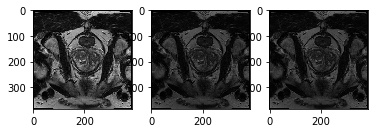

In [117]:
z = 9
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array_25[z, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array_25[z, :, :], 'gray', interpolation='none')
plt.imshow(mask_25[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array_25[z, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask_25[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()

In [168]:
# let's try to ranspose it avec une de 19 de size
t2_case_25 = t2_train_table.iloc[34]
t2_case_image_25 = sitk.ReadImage(str(t2_case_25['resampled_nifti']))
t2_case_image_25.GetSize()

(384, 384, 21)

In [184]:
t2_case_25 = t2_train_table.iloc[34]
t2_case_image_25 = sitk.ReadImage(str(t2_case_25['resampled_nifti']))
t2_array_25 = sitk.GetArrayViewFromImage(t2_case_image_25)

image_to_be_saved = sitk.GetImageFromArray(t2_array_25[:19])

writer = sitk.ImageFileWriter()
writer.SetFileName('E:/Memoire/ProstateX/random/ProstateX-0025.nii.gz')
writer.Execute(image_to_be_saved)

In [185]:

t2 = nib.load('E:/Memoire/ProstateX/random/ProstateX-0025.nii.gz')
MASK_PROS = nib.load('E:/Memoire/ProstateX/generated/Masks/Resampled/Prostate_Masks/ProstateX-0025.nii.gz')
MASK_LES = nib.load('E:/Memoire/ProstateX/generated/Masks/Resampled/T2_Lesions_Masks/ProstateX-0025-Finding1-t2_tse_tra_ROI.nii.gz')

t2_static = t2.get_fdata()
t2_static_grid2world = t2.affine

MASK_PROS_moving = MASK_PROS.get_fdata()
MASK_PROS_moving_grid2world = MASK_PROS.affine

MASK_LES_moving = MASK_LES.get_fdata()
MASK_LES_moving_grid2world = MASK_LES.affine

identity = np.eye(4)
MASK_PROS_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, MASK_PROS_moving.shape, MASK_PROS_moving_grid2world)
MASK_LES_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, MASK_LES_moving.shape, MASK_LES_moving_grid2world)


transformMASK_PROS = MASK_PROS_affine_map.transform(MASK_PROS_moving)
transformMASK_LES = MASK_LES_affine_map.transform(MASK_LES_moving)

transposed_pros = transformMASK_PROS.transpose(2,0,1)
for j in range(len(transposed_pros)) : 
    transposed_pros[j] = np.fliplr(np.rot90(np.fliplr(transposed_pros[j]), 3))

transposed_les = transformMASK_LES.transpose(2,0,1)
for j in range(len(transposed_les)) : 
    transposed_les[j] = np.fliplr(np.rot90(np.fliplr(transposed_les[j]), 3))



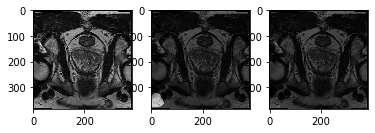

In [188]:
z = 10
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array_25[z, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array_25[z, :, :], 'gray', interpolation='none')
plt.imshow(transposed_pros[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array_25[z, :, :], 'gray', interpolation='none')
plt.imshow(transposed_les[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()

In [136]:
print(lesion_mask_46.shape)
print(t2_array_46.shape)
print(lesion_resampled.GetSize())
print(lesion_original.GetSize())

(19, 384, 384)
(19, 384, 384)
(384, 384, 19)
(384, 384, 19)


In [77]:
print(transposed_pros.shape)
print(transposed_les.shape)

(19, 384, 384)
(19, 384, 384)


In [201]:
path_pros = 'E:/Memoire/ProstateX/generated/Masks/Resampled/Prostate_Masks/'
lesions_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')
list_of_problems = []
for i in range(0, 299) : 
    lesion_case = lesions_table.iloc[i]
    prostate_mask = sitk.ReadImage(path_pros + lesion_case["ProxID"][:14] + ".nii.gz")
    path = str(lesion_case["resampled_nifti"])
    original_image = sitk.ReadImage(path.replace("resampled_nifti", "nifti"))
    resampled_image = sitk.ReadImage(path)

    if prostate_mask.GetSize() != resampled_image.GetSize() :
        print(lesion_case["ProxID"])
        print(prostate_mask.GetSize())
        print(original_image.GetSize())
        list_of_problems.append(lesion_case["ProxID"])

ProstateX-0025
(384, 384, 19)
(384, 384, 21)
ProstateX-0025
(384, 384, 19)
(384, 384, 21)
ProstateX-0025
(384, 384, 19)
(384, 384, 21)
ProstateX-0025
(384, 384, 19)
(384, 384, 21)
ProstateX-0025
(384, 384, 19)
(384, 384, 21)
ProstateX-0032
(384, 384, 23)
(384, 384, 26)
ProstateX-0073
(384, 384, 19)
(384, 384, 20)
ProstateX-0102
(385, 385, 21)
(384, 384, 21)
ProstateX-0128
(384, 384, 19)
(384, 384, 20)
ProstateX-0128
(384, 384, 19)
(384, 384, 20)
ProstateX-0128
(384, 384, 19)
(384, 384, 20)
ProstateX-0132
(384, 384, 19)
(384, 384, 23)
ProstateX-0141
(385, 385, 21)
(384, 384, 21)
ProstateX-0141
(385, 385, 21)
(384, 384, 21)
ProstateX-0141
(385, 385, 21)
(384, 384, 21)
ProstateX-0143
(384, 384, 19)
(384, 384, 20)
ProstateX-0148
(384, 384, 19)
(384, 384, 31)
ProstateX-0148
(384, 384, 19)
(384, 384, 31)
ProstateX-0152
(385, 385, 19)
(384, 384, 20)
ProstateX-0160
(385, 385, 21)
(384, 384, 21)
ProstateX-0160
(385, 385, 21)
(384, 384, 21)
ProstateX-0166
(385, 385, 19)
(384, 384, 19)
ProstateX-

In [237]:
t2_case_32 = t2_train_table.iloc[238]
t2_case_image_32 = sitk.ReadImage(str(t2_case_32['resampled_nifti']))
t2_array_32 = sitk.GetArrayViewFromImage(t2_case_image_32)
t2_case_32

Unnamed: 0                                                       292
ProxID                                                ProstateX-0152
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                1
pos                                     (4.73273, 22.4072, -77.2909)
ijk                                                    (179, 199, 9)
zone                                                              AS
ClinSig                                                        False
Name: 238, dtype: object

In [239]:
# let's test the cases in list of probs to see whatsup
mask_32 = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/ProstateX-0152.nii.gz.npy')
lesion_mask_32 = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0152-Finding1-t2_tse_tra0_ROI.nii.gz.npy')

# load les resampled
path = 'E:/Memoire/ProstateX/generated/Masks/Resampled/T2_Lesions_Masks/ProstateX-0152-Finding1-t2_tse_tra0_ROI.nii'
lesion_resampled = sitk.ReadImage(path)
path = 'E:/Memoire/ProstateX/generated/Masks/Resampled/Prostate_Masks/ProstateX-0152.nii'
prostate_resampled = sitk.ReadImage(path)


# load les originaux
path = 'E:/Memoire/ProstateX/Masks/Files/lesions/Masks/T2/ProstateX-0152-Finding1-t2_tse_tra0_ROI.nii'
lesion_original = sitk.ReadImage(path)
path = 'E:/Memoire/ProstateX/Masks/Files/prostate/mask_prostate/ProstateX-0152.nii'
prostate_original = sitk.ReadImage(path)

In [240]:
myshow(lesion_original)

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

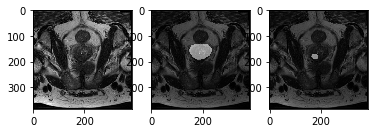

In [245]:
z = 10
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array_32[z, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array_32[z, :, :], 'gray', interpolation='none')
plt.imshow(mask_32[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array_32[z, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask_32[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()